## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
print(tf.config.list_physical_devices('GPU')) # Detect GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Preprocessing

In [3]:

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',                     # location of train folder
    labels="inferred",           # generate labels from directory structure
    label_mode="categorical",    # for categories of crop leaves
    class_names=None,
    color_mode="rgb",
    batch_size=32,               # feeds 32 images at once
    image_size=(128, 128),       # resize images from dataset's 256x256px to 128x128px
    shuffle=True,                # shuffle images before reading
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)   # same parameters as training_set

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:    # x: feature, y: label
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[152.25 154.25 143.25]
   [146.75 148.75 137.75]
   [149.   151.   140.  ]
   ...
   [110.   114.   113.  ]
   [118.   122.   121.  ]
   [114.75 118.75 117.75]]

  [[145.75 147.75 136.75]
   [143.   145.   134.  ]
   [153.5  155.5  144.5 ]
   ...
   [109.25 113.25 112.25]
   [113.   117.   116.  ]
   [110.25 114.25 113.25]]

  [[139.75 141.75 130.75]
   [145.5  147.5  136.5 ]
   [153.75 155.75 144.75]
   ...
   [107.   111.   110.  ]
   [107.5  111.5  110.5 ]
   [106.75 110.75 109.75]]

  ...

  [[132.5  139.5  132.5 ]
   [132.25 139.25 132.25]
   [131.75 138.75 131.75]
   ...
   [104.25 108.25 107.25]
   [102.5  106.5  105.5 ]
   [101.25 105.25 104.25]]

  [[132.   139.   132.  ]
   [131.25 138.25 131.25]
   [130.   137.   130.  ]
   ...
   [105.   109.   108.  ]
   [103.   107.   106.  ]
   [102.25 106.25 105.25]]

  [[128.   135.   128.  ]
   [127.75 134.75 127.75]
   [127.5  134.5  127.5 ]
   ...
   [107.   111.   110.  ]
   [105.5  109.5  108.5 ]
   [104.5  108.5  10

## Building CNN Model

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.40))

In [17]:
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Training Before Changes

Epoch 1/10
2197/2197 [==============================] - 158s 71ms/step - loss: 0.9160 - accuracy: 0.7315 - val_loss: 0.3205 - val_accuracy: 0.8986
Epoch 2/10
2197/2197 [==============================] - 249s 113ms/step - loss: 0.2872 - accuracy: 0.9081 - val_loss: 0.2333 - val_accuracy: 0.9276
Epoch 3/10
2197/2197 [==============================] - 294s 134ms/step - loss: 0.1675 - accuracy: 0.9443 - val_loss: 0.2016 - val_accuracy: 0.9381
Epoch 4/10
1457/2197 [==================>...........] - ETA: 1:38 - loss: 0.1215 - accuracy: 0.9605

## Training After Changes

### Training 1 Results

Epoch 1/10
2197/2197 [==============================] - 138s 62ms/step - loss: 1.3941 - accuracy: 0.5918 - val_loss: 0.6055 - val_accuracy: 0.8083
Epoch 2/10
2197/2197 [==============================] - 205s 93ms/step - loss: 0.4522 - accuracy: 0.8576 - val_loss: 0.2994 - val_accuracy: 0.9005
Epoch 3/10
2197/2197 [==============================] - 259s 118ms/step - loss: 0.2772 - accuracy: 0.9111 - val_loss: 0.2863 - val_accuracy: 0.9150
Epoch 4/10
2197/2197 [==============================] - 284s 129ms/step - loss: 0.1922 - accuracy: 0.9374 - val_loss: 0.1668 - val_accuracy: 0.9460
Epoch 5/10
2197/2197 [==============================] - 333s 152ms/step - loss: 0.1399 - accuracy: 0.9538 - val_loss: 0.1645 - val_accuracy: 0.9487
Epoch 6/10
2197/2197 [==============================] - 305s 139ms/step - loss: 0.1164 - accuracy: 0.9615 - val_loss: 0.1829 - val_accuracy: 0.9442
Epoch 7/10
2197/2197 [==============================] - 305s 139ms/step - loss: 0.0911 - accuracy: 0.9698 - val_loss: 0.2531 - val_accuracy: 0.9262
Epoch 8/10
2197/2197 [==============================] - 298s 136ms/step - loss: 0.0760 - accuracy: 0.9751 - val_loss: 0.1375 - val_accuracy: 0.9585
Epoch 9/10
2197/2197 [==============================] - 294s 134ms/step - loss: 0.0656 - accuracy: 0.9788 - val_loss: 0.1297 - val_accuracy: 0.9608
Epoch 10/10
2197/2197 [==============================] - 294s 134ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.1308 - val_accuracy: 0.9624

### Training 2 Results

Epoch 1/10
2197/2197 [==============================] - 159s 70ms/step - loss: 1.3977 - accuracy: 0.5874 - val_loss: 0.5498 - val_accuracy: 0.8271
Epoch 2/10
2197/2197 [==============================] - 231s 105ms/step - loss: 0.4825 - accuracy: 0.8481 - val_loss: 0.3011 - val_accuracy: 0.9051
Epoch 3/10
2197/2197 [==============================] - 280s 128ms/step - loss: 0.2791 - accuracy: 0.9094 - val_loss: 0.2810 - val_accuracy: 0.9137
Epoch 4/10
2197/2197 [==============================] - 277s 126ms/step - loss: 0.1952 - accuracy: 0.9365 - val_loss: 0.1888 - val_accuracy: 0.9384
Epoch 5/10
2197/2197 [==============================] - 277s 126ms/step - loss: 0.1479 - accuracy: 0.9508 - val_loss: 0.1313 - val_accuracy: 0.9591
Epoch 6/10
2197/2197 [==============================] - 286s 130ms/step - loss: 0.1106 - accuracy: 0.9635 - val_loss: 0.1621 - val_accuracy: 0.9484
Epoch 7/10
2197/2197 [==============================] - 277s 126ms/step - loss: 0.0903 - accuracy: 0.9700 - val_loss: 0.1331 - val_accuracy: 0.9585
Epoch 8/10
2197/2197 [==============================] - 275s 125ms/step - loss: 0.0799 - accuracy: 0.9741 - val_loss: 0.1081 - val_accuracy: 0.9665
Epoch 9/10
2197/2197 [==============================] - 294s 134ms/step - loss: 0.0658 - accuracy: 0.9785 - val_loss: 0.1202 - val_accuracy: 0.9645
Epoch 10/10
2197/2197 [==============================] - 308s 140ms/step - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.1905 - val_accuracy: 0.9513

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 188s 82ms/step - loss: 1.3766 - accuracy: 0.5937 - val_loss: 0.4682 - val_accuracy: 0.8517
Epoch 2/10
2197/2197 [==============================] - 233s 106ms/step - loss: 0.4520 - accuracy: 0.8561 - val_loss: 0.3001 - val_accuracy: 0.9035
Epoch 3/10
2197/2197 [==============================] - 239s 109ms/step - loss: 0.2656 - accuracy: 0.9131 - val_loss: 0.1927 - val_accuracy: 0.9411
Epoch 4/10
2197/2197 [==============================] - 261s 119ms/step - loss: 0.1880 - accuracy: 0.9383 - val_loss: 0.2622 - val_accuracy: 0.9174
Epoch 5/10
2197/2197 [==============================] - 263s 120ms/step - loss: 0.1374 - accuracy: 0.9543 - val_loss: 0.1418 - val_accuracy: 0.9538
Epoch 6/10
2197/2197 [==============================] - 251s 114ms/step - loss: 0.1134 - accuracy: 0.9622 - val_loss: 0.2317 - val_accuracy: 0.9282
Epoch 7/10
2197/2197 [==============================] - 251s 114ms/step - loss: 0.0884 - accuracy: 0.9709 - val_l

### Model Evaluation

In [21]:

train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 77s 35ms/step - loss: 0.0306 - accuracy: 0.9912


In [22]:
print(train_loss,train_acc)

0.030573949217796326 0.9912226796150208


In [23]:
valid_loss,valid_acc = model.evaluate(validation_set)

550/550 [==============================] - 17s 31ms/step - loss: 0.1323 - accuracy: 0.9622


In [24]:
print(valid_loss,valid_acc)

0.13232815265655518 0.9622126221656799


In [25]:
model.save("trained_model.keras")
model.save("trained_model.h5")

Trained Model was saved to "trained_model.keras" in this folder 

In [26]:
# Changing Model from .h5 to .keras Extension
'''import tensorflow as tf
model = tf.keras.models.load_model("trained_model.h5")
model.save("trained_model.keras")'''

'import tensorflow as tf\nmodel = tf.keras.models.load_model("trained_model.h5")\nmodel.save("trained_model.keras")'

In [27]:
training_history.history

{'loss': [1.3765720129013062,
  0.45202556252479553,
  0.2656097710132599,
  0.1879795491695404,
  0.13743050396442413,
  0.11338157206773758,
  0.08839097619056702,
  0.0736871287226677,
  0.06325355917215347,
  0.05527946352958679],
 'accuracy': [0.5936979651451111,
  0.8561206459999084,
  0.9130663871765137,
  0.9383455514907837,
  0.9542784094810486,
  0.9622306227684021,
  0.9708656668663025,
  0.9764279127120972,
  0.9792730808258057,
  0.9825592041015625],
 'val_loss': [0.4682019054889679,
  0.30005452036857605,
  0.19269844889640808,
  0.2622305452823639,
  0.14179977774620056,
  0.23172008991241455,
  0.15276196599006653,
  0.12457214295864105,
  0.12696923315525055,
  0.13232818245887756],
 'val_accuracy': [0.8516958951950073,
  0.9034827947616577,
  0.9410994648933411,
  0.9174254536628723,
  0.9538470506668091,
  0.9282380938529968,
  0.9532210230827332,
  0.9631231427192688,
  0.9646027684211731,
  0.9622126221656799]}

## Model Testing

In [28]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 18s 32ms/step


(array([[1.00000000e+00, 1.62449304e-10, 2.29761482e-14, ...,
         9.27971433e-19, 3.12845581e-18, 1.42339726e-15],
        [9.99985695e-01, 1.40040538e-05, 1.19900895e-10, ...,
         8.17564078e-15, 1.13985319e-13, 8.05319285e-14],
        [1.00000000e+00, 1.53207926e-12, 2.01046150e-15, ...,
         4.38583076e-21, 2.65603828e-18, 3.68660529e-16],
        ...,
        [1.15354074e-10, 2.37719783e-12, 1.33068362e-10, ...,
         1.00333338e-12, 2.08996210e-12, 9.99999881e-01],
        [5.36380836e-11, 8.09941374e-14, 2.61035464e-11, ...,
         6.74338650e-14, 1.06304527e-12, 1.00000000e+00],
        [1.03551928e-18, 2.52877799e-19, 1.03296363e-16, ...,
         1.11339312e-19, 1.56935459e-15, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [31]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [33]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

## Confusion Matrix

In [34]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.98      0.95       504
                                 Apple___Black_rot       1.00      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.95       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

In [35]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[492,   2,   0, ...,   0,   0,   0],
       [  2, 474,   0, ...,   0,   0,   0],
       [  2,   0, 407, ...,   4,   0,   1],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 475]], dtype=int64)

In [36]:
cm.shape    # 38 predicted categories, 38 true categories

(38, 38)

<function matplotlib.pyplot.show(close=None, block=None)>

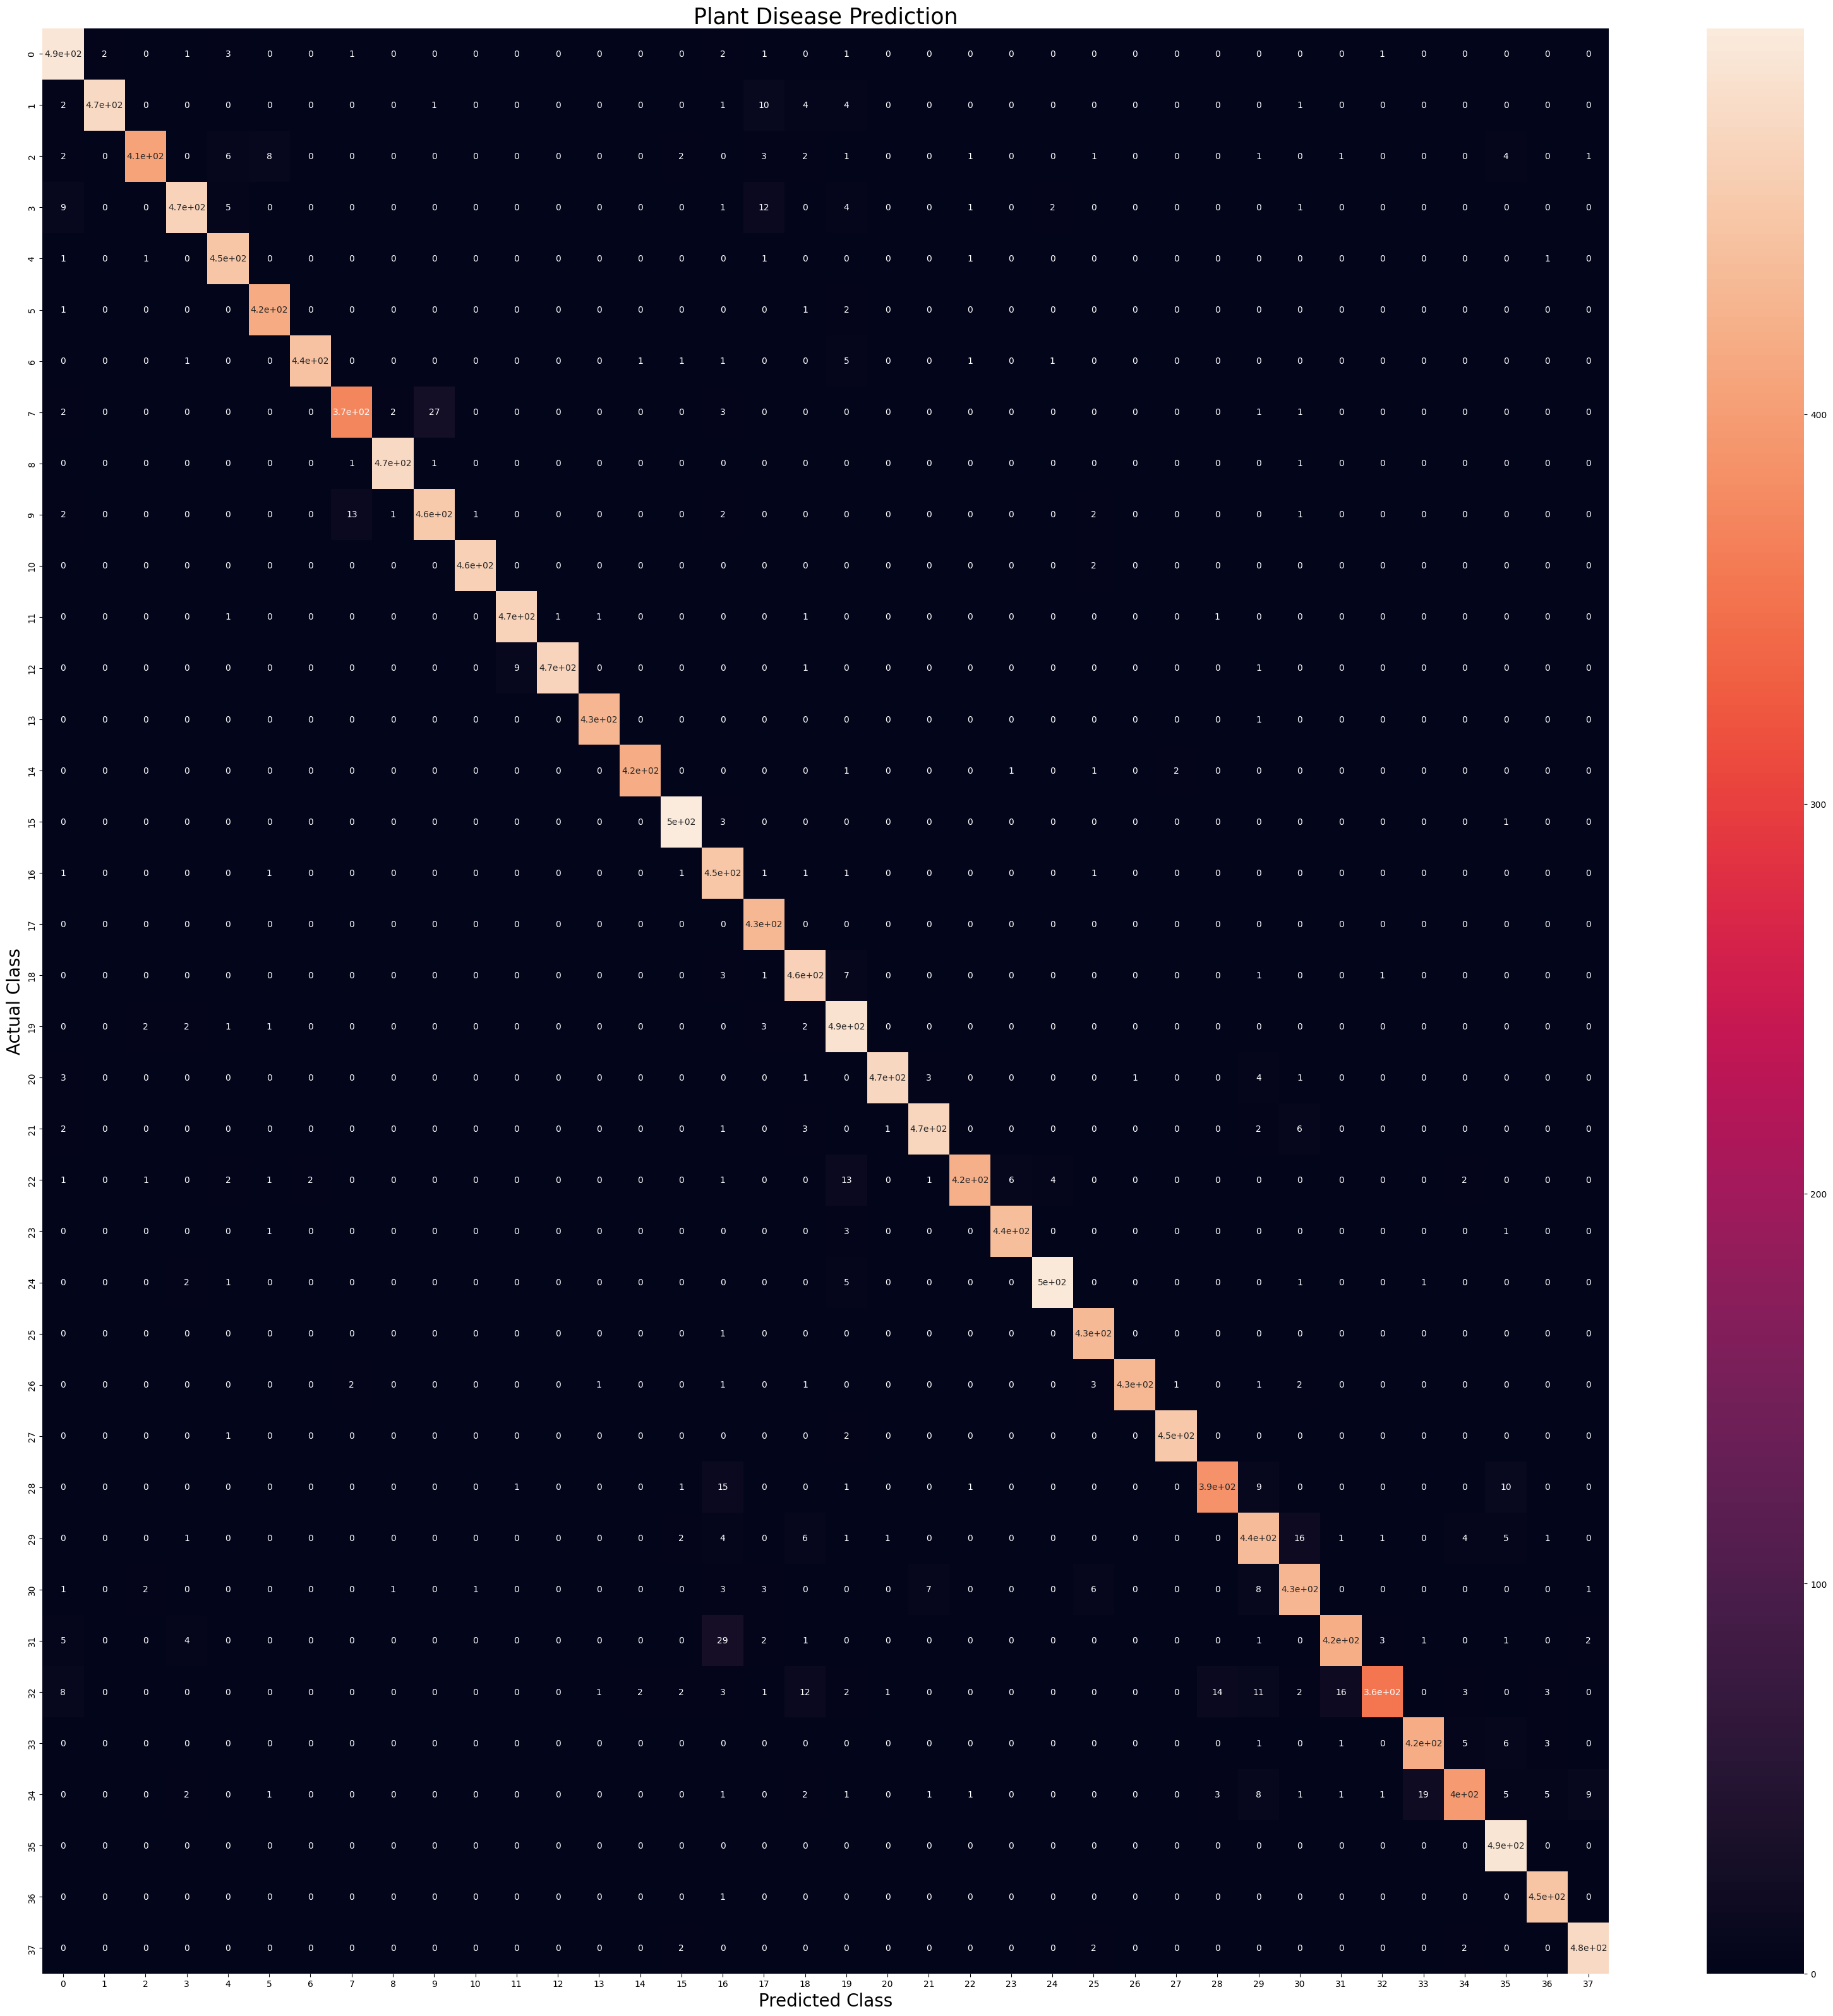

In [37]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction", fontsize=25)
plt.show